In [ ]:
# Inflation, GDP, 
!pip install geopandas
!pip install openpyxl
!python3 -m pip install -U matplotlib
!pip install mapclassify
!pip install streamlit
!pip install yfinance
!pip install pyngrok

%matplotlib inline  

import matplotlib.pyplot as plt
from pandas_datareader import wb
import geopandas
import pandas as pd
import mapclassify
import streamlit as st
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD', country='all', start=2021, end=2021)
inf_data = wb.download(indicator='FP.CPI.TOTL.ZG', country='all', start=2021, end=2021)
pop_data = wb.download(indicator='SP.POP.GROW', country='all', start=2021, end=2021)


gdp_data = gdp_data.reset_index(1)
inf_data = inf_data.reset_index(1)
pop_data = pop_data.reset_index(1)

gdp_data.columns = ['year', 'GDP']
inf_data.columns = ['year', 'Inflation']
pop_data.columns = ['year', 'Population Growth']

display(print(inf_data.head()))
display(print(pop_data.head()))
print(gdp_data.head(1000))

                                year  Inflation
country                                        
Africa Eastern and Southern     2021   7.240978
Africa Western and Central      2021   3.925603
Arab World                      2021   3.243460
Caribbean small states          2021   2.236850
Central Europe and the Baltics  2021   3.839845


None

                                year  Population Growth
country                                                
Africa Eastern and Southern     2021           2.572461
Africa Western and Central      2021           2.636291
Arab World                      2021           1.934746
Caribbean small states          2021           0.528601
Central Europe and the Baltics  2021          -0.492044


None

                                year           GDP
country                                           
Africa Eastern and Southern     2021  1.082096e+12
Africa Western and Central      2021  8.358084e+11
Arab World                      2021  2.850421e+12
Caribbean small states          2021  6.997032e+10
Central Europe and the Baltics  2021  1.887902e+12
...                              ...           ...
Virgin Islands (U.S.)           2021           NaN
West Bank and Gaza              2021  1.803680e+10
Yemen, Rep.                     2021  2.106169e+10
Zambia                          2021  2.120306e+10
Zimbabwe                        2021  2.621773e+10

[266 rows x 2 columns]


In [ ]:
gdp_data.dropna()
inf_data.dropna()
pop_data.dropna()

,year,Population Growth
country,,
Africa Eastern and Southern,2021,2.572461
Africa Western and Central,2021,2.636291
Arab World,2021,1.934746
Caribbean small states,2021,0.528601
Central Europe and the Baltics,2021,-0.492044
...,...,...
Virgin Islands (U.S.),2021,-0.395928
West Bank and Gaza,2021,2.457039
"Yemen, Rep.",2021,2.204030


In [ ]:
# Overwrites existing workbook

#with pd.ExcelWriter('World Bank Data.xlsx', engine='openpyxl') as writer:
    #gdp_data.to_excel(writer, sheet_name="gdp")
    #pop_data.to_excel(writer, sheet_name="pop")
    #inf_data.to_excel(writer, sheet_name="inf")

#gdp_data.to_excel("GDP Data.xlsx") #Second Method to export to Excel

In [ ]:
# Geopandas Global Map

map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')) # Map Data
map = map[map['name'] != 'Antarctica'] # Removes Antarctica 
map = map.set_index('name')
index_change = {
    'United States of America': 'United States',
    'Russian Federation': 'Russia'
}




In [ ]:
map = map.rename(index=index_change)
data3 = map.join(inf_data, how='outer')
data4 = map.join(gdp_data, how='outer')
data5 = map.join(pop_data, how='outer')

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 1000)


In [ ]:
print(data3)


                                                         pop_est                continent iso_a3   gdp_md_est                                           geometry  year   Inflation
Afghanistan                                         3.412481e+07                     Asia    AFG     64080.00  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  2021         NaN
Africa Eastern and Southern                                  NaN                      NaN    NaN          NaN                                               None  2021    7.240978
Africa Western and Central                                   NaN                      NaN    NaN          NaN                                               None  2021    3.925603
Albania                                             3.047987e+06                   Europe    ALB     33900.00  POLYGON ((21.02004 40.84273, 20.99999 40.58000...  2021    2.041472
Algeria                                             4.096944e+07                   Africa    DZA    60940

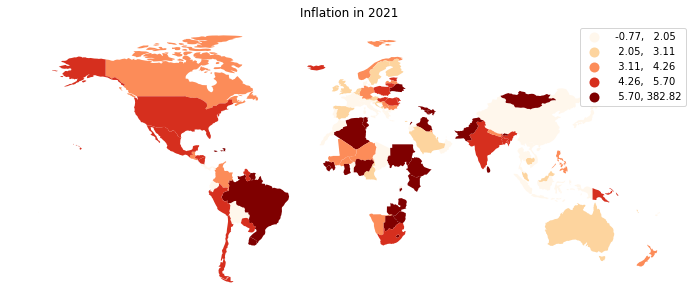

In [ ]:
data3.plot('Inflation', cmap='OrRd', scheme='quantiles', legend=True, figsize=(14,5))
plt.title('Inflation in 2021')
plt.axis('off')
plt.show()


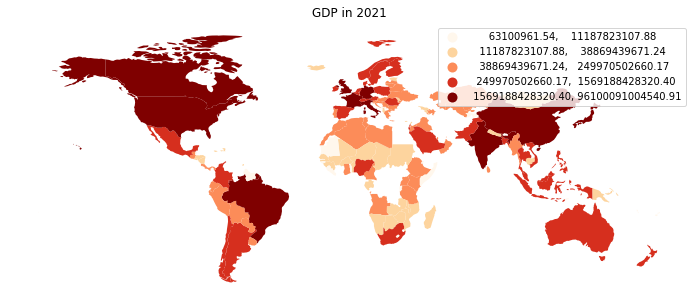

In [ ]:
data4.plot('GDP', cmap='OrRd', scheme='quantiles', legend=True, figsize=(14,5))
plt.title('GDP in 2021')
plt.axis('off')
plt.show()

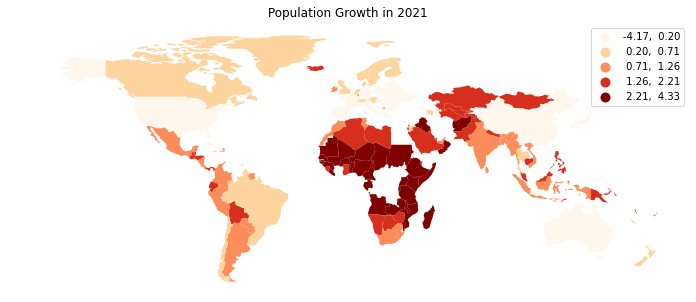

In [ ]:
data5.plot('Population Growth', cmap='OrRd', scheme='quantiles', legend=True, figsize=(14,5))
plt.title('Population Growth in 2021')
plt.axis('off')
plt.show()

In [ ]:
%%writefile proxy.py
from pyngrok import ngrok
ngrok.set_auth_token("2BN69dA3x2wfALUtuHVyEqPEAOj_2q2kN8gLvPvE3ex4xoKA3")
public_url = ngrok.connect(port="8501").public_url
print(f"ngrok tunnel {public_url}")

Writing proxy.py


In [ ]:
%%writefile app.py

st.write("""
    # Simple Stock Price App

    Shown are the stock closing price and volume of Google!
"""
)


tickerSymbol = 'SPY'

tickerData = yf.Ticker(tickerSymbol)

tickerDf = tickerData.history(period='1d', start='2012-7-01', end='2022-5-01')

st.line_chart(tickerDf.Close)
st.line_chart(tickerDf.Volume)


Overwriting app.py


In [ ]:
!python proxy.py & streamlit run app.py
#!streamlit run app.py&>/dev/null& # Alternate way

2022-07-02 16:53:54.364 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
ngrok tunnel http://0a8c-34-90-155-49.ngrok.io

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.90.155.49:8501



In [ ]:
!pgrep streamlit

587


<NgrokTunnel: "http://8cd4-34-90-155-49.ngrok.io" -> "http://localhost:80">